In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data1 = np.loadtxt("ex2data1.txt", delimiter = ',')
df1 = pd.DataFrame(data1 , columns = ['marks1', 'marks2', 'probability'])
m = df1.shape[0]
df1.head()

,marks1,marks2,probability
0,34.623660,78.024693,0.0
1,30.286711,43.894998,0.0
2,35.847409,72.902198,0.0
3,60.182599,86.308552,1.0
4,79.032736,75.344376,1.0


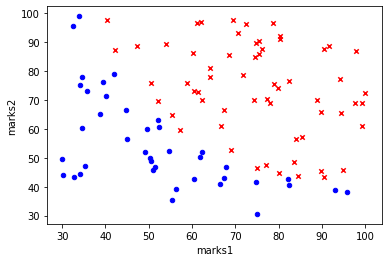

In [3]:
#plotting data for visualization using pd.plot
ax = df1[df1['probability'] == 0].plot.scatter('marks1', 'marks2', color='blue')
df1[df1['probability'] == 1].plot.scatter('marks1', 'marks2', color='red' , marker = 'x', ax = ax)
plt.savefig("plotting")

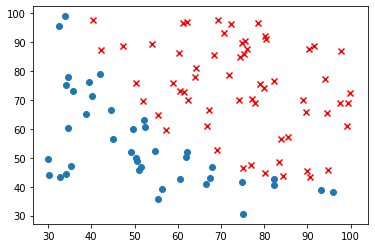

In [4]:
#plotting data for visualization using matplotlib
plt.scatter(df1[df1['probability'] == 0]['marks1'], df1[df1['probability'] == 0]['marks2'])
plt.scatter(df1[df1['probability'] == 1]['marks1'], df1[df1['probability'] == 1]['marks2'],color='red' , marker = 'x')
plt.savefig("plotting")

In [5]:
#since it can be fitter with linear data , we will use linear logistic regression
def sigmoid(z):                #sigmoid function
    return 1/(1+np.exp(-z))

In [6]:
def h(theta, X):             #hypothesis function
    return sigmoid(np.dot(X, theta))

In [7]:
def J(h, y , m):                  #cost function
    return float(-(np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1 - h)))/m)

In [8]:
#Gradient descent
theta1 = np.zeros((3,1))
alpha = 0.001
X1 = np.ones((m,3))
X1[:,1:] = data1[:,0:2] 
y1 = data1[:,2].reshape(m,1)
h1 = h(theta1, X1)
#J(h1 , y1 , m)

#grad = np.dot(X1.T , (h1 - y1))/m
#grad

for i in range(10000000):
    theta1 -= alpha*np.dot(X1.T , (h1 - y1))/m
    h1 = h(theta1 , X1)

In [11]:
theta1

array([[-24.73684959],
       [  0.2028365 ],
       [  0.19803678]])

In [14]:
J(h1, y1 , m)

0.20352489044827862

In [15]:
#changing hypothesis to 0/1
for i in range(m):
       if(h1[i]>=0.5):
            h1[i] = 1
       else :
            h1[i] = 0   

In [16]:
accuracy = h1[h1 == y1].shape[0]/m
accuracy

0.89

In [17]:
#for plotting Decision Boundary of logistic regression
plot_x = np.array([min(X1[:,1]) - 2, max(X1[:,1]) + 2])
plot_y = (-1/theta1[2]) * (theta1[1] * plot_x + theta1[0])

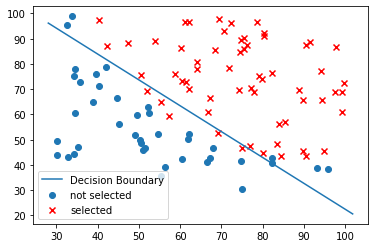

In [18]:
plt.scatter(df1[df1['probability'] == 0]['marks1'], df1[df1['probability'] == 0]['marks2'], label = 'not selected')
plt.scatter(df1[df1['probability'] == 1]['marks1'], df1[df1['probability'] == 1]['marks2'],color='red' , marker = 'x', label = 'selected')
plt.plot(plot_x , plot_y , label = 'Decision Boundary')
plt.legend()
plt.savefig("plotting")


In [62]:
#Regularixed Logistic Regression
data2 = np.loadtxt("ex2data2.txt", delimiter = ',')
df2  = pd.DataFrame(data2, columns = ['test1', 'test2', 'selected'] )
m2 = len(df2)
df2.head()

,test1,test2,selected
0,0.051267,0.69956,1.0
1,-0.092742,0.68494,1.0
2,-0.213710,0.69225,1.0
3,-0.375000,0.50219,1.0
4,-0.513250,0.46564,1.0


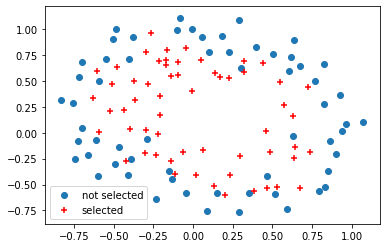

In [20]:
plt.scatter(df2[df2['selected'] == 0]['test1'], df2[df2['selected'] == 0]['test2'], label = 'not selected')
plt.scatter(df2[df2['selected'] == 1]['test1'], df2[df2['selected'] == 1]['test2'], label = 'selected', marker= '+', color= 'red')
plt.legend()
plt.savefig("data_plot_polynomial")

Figure shows that our dataset cannot be separated into positive and
negative examples by a straight-line through the plot. Therefore, a straight-
forward application of logistic regression will not perform well on this dataset
since logistic regression will only be able to find a linear decision boundary

Feature mapping-
One way to fit the data better is to create more features from each data
point. In the provided function mapFeature.m, we will map the features into
all polynomial terms of x 1 and x 2 up to the sixth power.

While the feature mapping allows us to build a more expressive classifier,
it also more susceptible to overfitting

Therefore, we will use Regularized Cost Function.

In [65]:
#Feature Mapping
degree = 6
X2 = np.ones((118,28))
column = []
for i in range(28):
    column.append('x' + str(i))
temp  = pd.DataFrame(X2, columns = column )


def rng(i):
    a = list(range(i))
    a.append(i)
    return a

def rng1(i):
    a = np.arange(i)
    a += 1
    return a

rng(degree)

[0, 1, 2, 3, 4, 5, 6]

In [66]:
p=1
for i in rng1(degree):
    for j in rng(i):
        temp.iloc[:,p] = np.power(data2[:,0] , i-j)*np.power(data2[:,1], j)
        p += 1

In [125]:
X2 = temp.values
#
#temp

In [68]:
def J_reg(h, y , m , theta):                  #cost function
    return float(-(np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1 - h)))/m) + lambd*((theta*theta).sum() - (theta[0]*theta[0]))/(2*m)

In [126]:
theta2 = np.zeros((28,1))
test_theta = np.ones((28,1))
alpha = 0.0001
lambd = 10
y2 = data2[:,2].reshape(m2,1)
h2 = h(test_theta, X2)
grad = np.dot(X2.T , (h2 - y2))/m2 + lambd*test_theta/m2
grad[0] = np.dot(X2.T , (h2 - y2))[0]/m2 
#J_reg(h2 , y2 ,  m2,test_theta)
#J_reg(h2 , y2 ,  m2, theta2)
#grad

In [118]:
#Gradient descent
theta2 = np.zeros((28,1))
alpha = 0.0001
lambd = 1
y2 = data2[:,2].reshape(m2,1)
h2 = h(theta2, X2)
#J(h1 , y1 , m)

#grad = np.dot(X1.T , (h1 - y1))/m
#grad

for i in range(1000000):
    theta2[1:] -= alpha*(np.dot(X2.T , (h2 - y2))[1:]/m2 + lambd*theta2[1:]/m2)
    theta2[0] -= alpha*np.dot(X2.T , (h2 - y2))[0]/m2 
    h2 = h(theta2 , X2)


In [119]:
J_reg(h2, y2, m2 , theta2)

array([0.53442849])

In [120]:
#h2

In [121]:
#changing hypothesis to 0/1
for i in range(m2):
       if(h2[i]>=0.5):
            h2[i] = 1
       else :
            h2[i] = 0   

In [122]:
accuracy2 = h2[h2 == y2].shape[0]/m2
accuracy2

0.8305084745762712

In [123]:
def grad(theta, X , h , y , m):
    return np.dot(X.T , (h - y))[1:]/m + lambd*theta[1:]/m